In [627]:
import matplotlib.pyplot as plt
import pandas as pd 
import config
from matplotlib import colormaps

CSV format: `algorithm, type, speed, speed_iterations, memory, memory_iterations, audio_length, sample_rate, factor`

algorithm - name of the algorithm (str)  
type - PS/TSM (str)   
speed - time in seconds  
speed_iterations - number of iterations for measuring speed  
memory - peak memory allocated in bits  
memory_iterations - number of iterations for measuring memory  
audio_length - length of audio sample in seconds  
sample_rate - sample rate of the audio sample  
factor - tsm or ps factor  

In [628]:
cmap = colormaps.get_cmap('Pastel1')
colors = cmap.colors

data = f"{config.EVAL_OBJ_DIR}/performance/performance_2504091009.csv"
df = pd.read_csv(data)

df['memory'] = df['memory'] / (1024 * 1024) # change memory usage to MB

df_ps = df[df['type'] == 'PS']
df_tsm = df[df['type'] == 'TSM']
df_ps

,algorithm,type,speed,speed_iterations,memory,memory_iterations,audio_length,sample_rate,factor
30,PSOLA,PS,1.964171,50,54.986385,5,5.466083,48000,-7.0
31,PSOLA,PS,1.896988,50,54.985798,5,5.466083,48000,-1.0
32,PSOLA,PS,1.900964,50,54.985632,5,5.466083,48000,1.0
33,PSOLA,PS,1.909046,50,54.986077,5,5.466083,48000,3.0
34,PSOLA,PS,1.920367,50,54.986005,5,5.466083,48000,7.0
...,...,...,...,...,...,...,...,...,...
265,LibrosaPS,PS,0.024041,50,5.561661,5,2.266292,48000,-1.0
266,LibrosaPS,PS,0.026011,50,5.890714,5,2.266292,48000,1.0
267,LibrosaPS,PS,0.028890,50,6.346360,5,2.266292,48000,3.0
268,LibrosaPS,PS,0.035199,50,7.599066,5,2.266292,48000,7.0


### Average Speed and Memory

In [629]:
# Calculate average speed for PS and TSM separately
avg_speed_ps = df_ps.groupby(['algorithm'])['speed'].mean().reset_index()
avg_speed_tsm = df_tsm.groupby(['algorithm'])['speed'].mean().reset_index()

# Calculate average speed for PS and TSM separately
avg_memory_ps = df_ps.groupby(['algorithm'])['memory'].mean().reset_index()
avg_memory_tsm = df_tsm.groupby(['algorithm'])['memory'].mean().reset_index()

avg_speed_ps = avg_speed_ps.sort_values(by='algorithm')
avg_speed_tsm = avg_speed_tsm.sort_values(by='algorithm')
avg_memory_ps = avg_memory_ps.sort_values(by='algorithm')
avg_memory_tsm = avg_memory_tsm.sort_values(by='algorithm')

In [630]:
memory_out = df.groupby(['algorithm', 'type'])['memory'].agg(['mean', 'std']).reset_index()
memory_out.rename(columns={'type': 'Type', 'algorithm': 'Algorithm', 'mean': 'Avg. Memory', 'std': 'Std. Memory'}, inplace=True)
memory_out.sort_values(by='Type', inplace=True)

memory_out
memory_out.to_csv('evaluation/objective/performance/memory_avg.csv', index=False)


In [631]:
speed_out = df.groupby(['algorithm', 'type'])['speed'].agg(['mean', 'std']).reset_index()
speed_out.rename(columns={'type': 'Type', 'algorithm': 'Algorithm', 'mean': 'Avg. Speed', 'std': 'Std. Speed'}, inplace=True)
speed_out.sort_values(by='Type', inplace=True)

speed_out.to_csv('evaluation/objective/performance/speed_avg.csv', index=False)

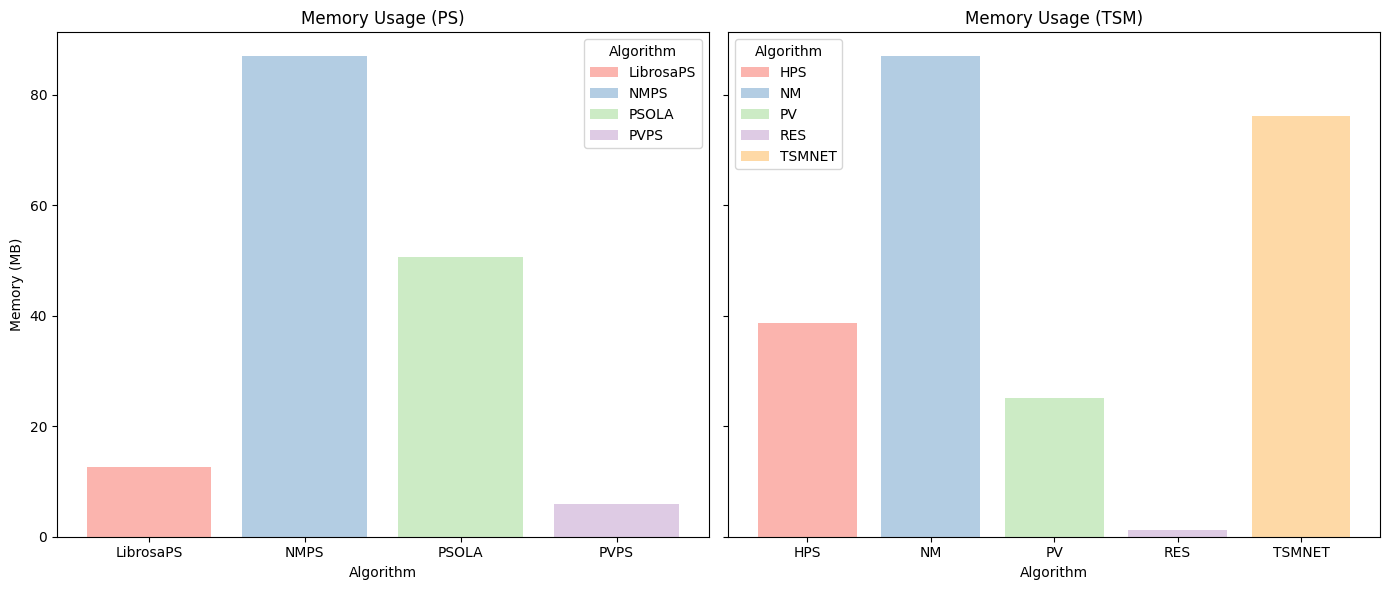

In [632]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(avg_memory_ps['algorithm'], avg_memory_ps['memory'], label=avg_memory_ps['algorithm'], color=colors)
axes[0].set_title('Memory Usage (PS)')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Memory (MB)')
axes[0].legend(title='Algorithm')

axes[1].bar(avg_memory_tsm['algorithm'], avg_memory_tsm['memory'], label=avg_memory_tsm['algorithm'], color=colors)
axes[1].set_title('Memory Usage (TSM)')
axes[1].set_xlabel('Algorithm')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()


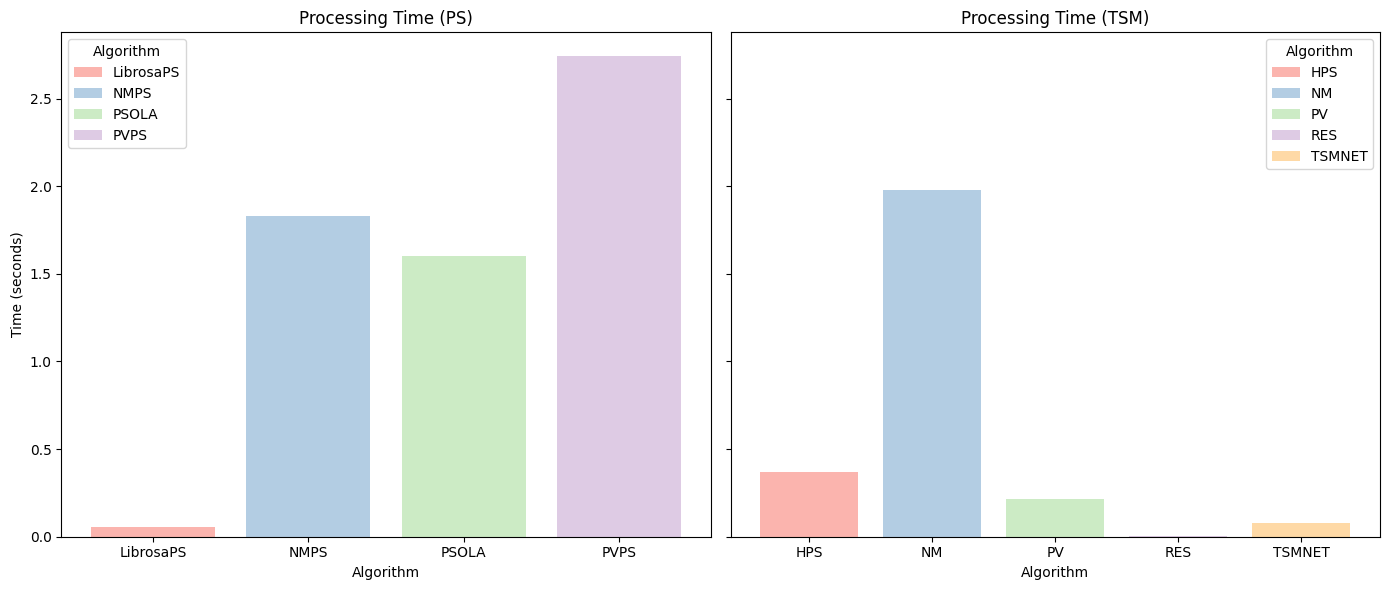

In [633]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(avg_speed_ps['algorithm'], avg_speed_ps['speed'], label=avg_speed_ps['algorithm'], color=colors)
axes[0].set_title('Processing Time (PS)')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Time (seconds)')
axes[0].legend(title='Algorithm')

axes[1].bar(avg_speed_tsm['algorithm'], avg_speed_tsm['speed'], label=avg_speed_tsm['algorithm'], color=colors)
axes[1].set_title('Processing Time (TSM)')
axes[1].set_xlabel('Algorithm')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()


### Audio Length vs Speed and Memory

In [634]:
# Calculate average speed for PS and TSM separately
avg_speed_ps = df_ps.groupby(['algorithm', 'audio_length'])['speed'].mean().reset_index()
avg_speed_tsm = df_tsm.groupby(['algorithm', 'audio_length'])['speed'].mean().reset_index()

# Calculate average speed for PS and TSM separately
avg_memory_ps = df_ps.groupby(['algorithm', 'audio_length'])['memory'].mean().reset_index()
avg_memory_tsm = df_tsm.groupby(['algorithm', 'audio_length'])['memory'].mean().reset_index()

avg_speed_ps = avg_speed_ps.sort_values(by='algorithm')
avg_speed_tsm = avg_speed_tsm.sort_values(by='algorithm')
avg_memory_ps = avg_memory_ps.sort_values(by='algorithm')
avg_memory_tsm = avg_memory_tsm.sort_values(by='algorithm')


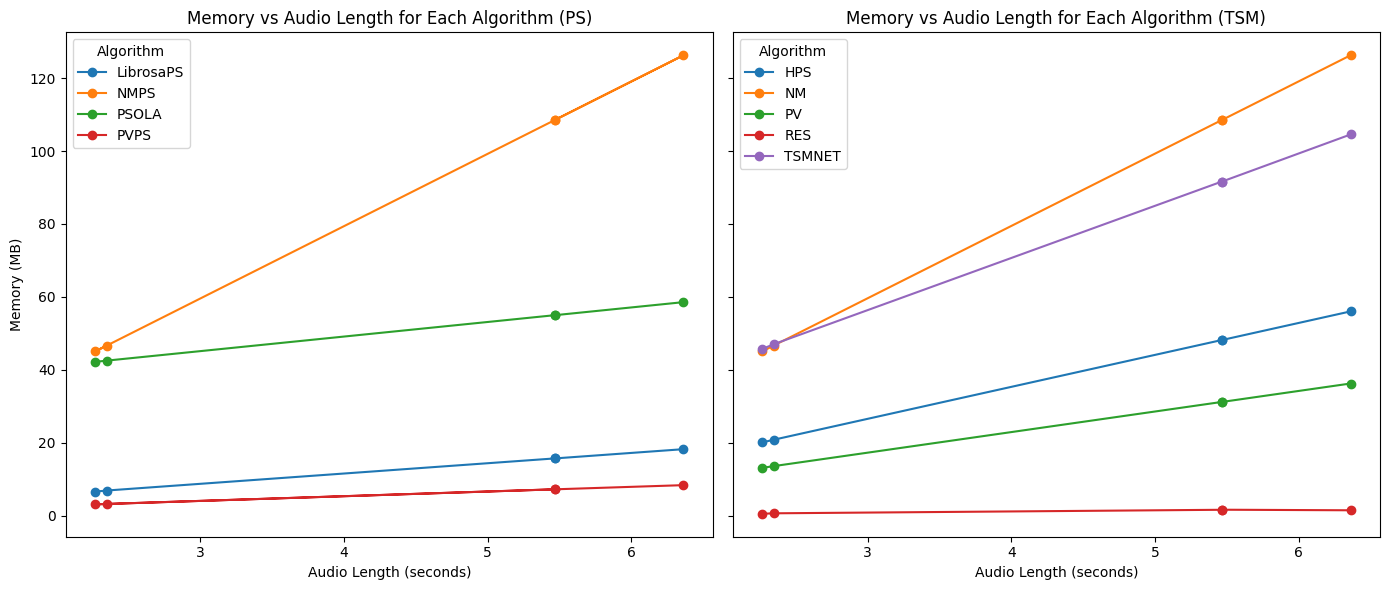

In [635]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for each algorithm in avg_memory_ps
for name, group in avg_memory_ps.groupby('algorithm'):
    axes[0].plot(group['audio_length'], group['memory'], label=name, marker='o')
axes[0].set_title('Memory vs Audio Length for Each Algorithm (PS)')
axes[0].set_xlabel('Audio Length (seconds)')
axes[0].legend(title='Algorithm')
axes[0].set_ylabel('Memory (MB)')

# Scatter plot for each algorithm in avg_memory_tsm
for name, group in avg_memory_tsm.groupby('algorithm'):
    axes[1].plot(group['audio_length'], group['memory'], label=name, marker='o')
axes[1].set_title('Memory vs Audio Length for Each Algorithm (TSM)')
axes[1].set_xlabel('Audio Length (seconds)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()

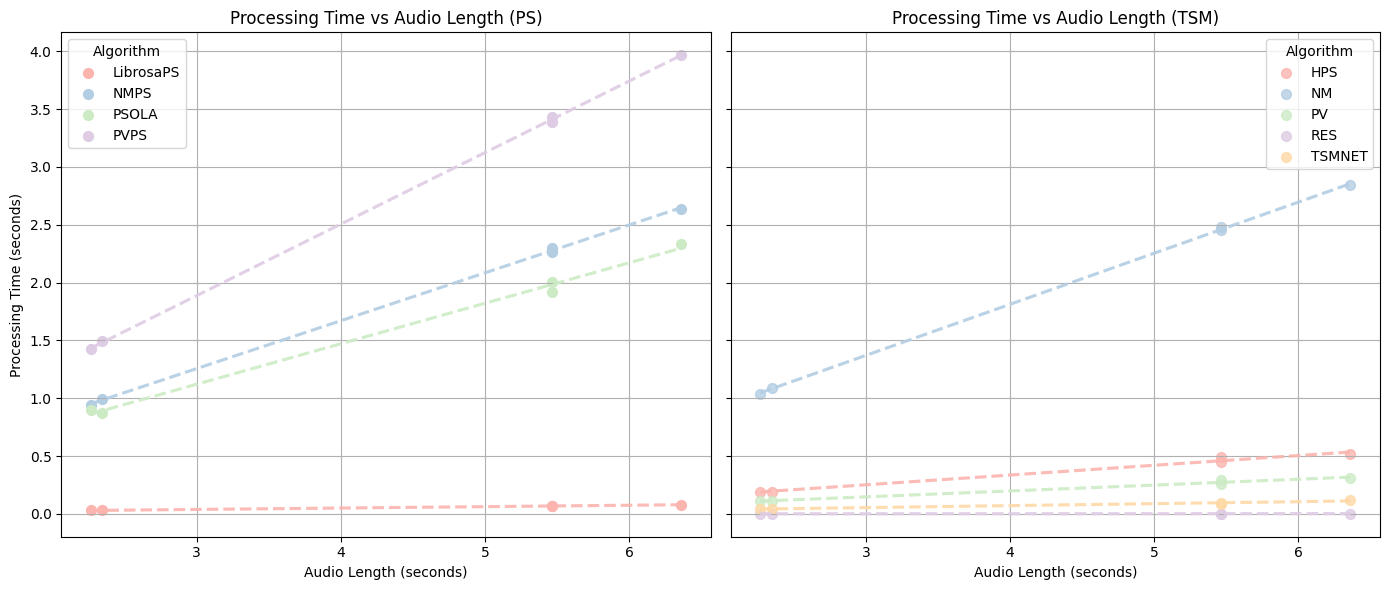

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Trend line for PS data frame grouped by algorithm
for idx, (name, group) in enumerate(avg_speed_ps.groupby('algorithm')):
    sns.regplot(
        x='audio_length', y='speed', data=group, ax=axes[0], label=name, 
        scatter_kws={'s': 50, 'color': colors[idx % len(colors)]}, 
        ci=None, 
        line_kws={'alpha': 0.9, 'linestyle': '--', 'color': colors[idx % len(colors)]}
    )
axes[0].set_title('Processing Time vs Audio Length (PS)')
axes[0].set_xlabel('Audio Length (seconds)')
axes[0].set_ylabel('Processing Time (seconds)')
axes[0].legend(title='Algorithm')
axes[0].grid(True)  # Add grid lines

# Trend line for TSM data frame grouped by algorithm
for idx, (name, group) in enumerate(avg_speed_tsm.groupby('algorithm')):
    sns.regplot(
        x='audio_length', y='speed', data=group, ax=axes[1], label=name, 
        scatter_kws={'s': 50, 'color': colors[idx % len(colors)]}, 
        ci=None, 
        line_kws={'alpha': 0.9, 'linestyle': '--', 'color': colors[idx % len(colors)]}
    )
axes[1].set_title('Processing Time vs Audio Length (TSM)')
axes[1].set_xlabel('Audio Length (seconds)')
axes[1].legend(title='Algorithm')
axes[1].grid(True)  # Add grid lines
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### Factor vs Speed and Memory

In [637]:
# Calculate average speed for PS and TSM separately
avg_speed_ps = df_ps.groupby(['algorithm', 'factor'])['speed'].mean().reset_index()
avg_speed_tsm = df_tsm.groupby(['algorithm', 'factor'])['speed'].mean().reset_index()

# Calculate average speed for PS and TSM separately
avg_memory_ps = df_ps.groupby(['algorithm', 'factor'])['memory'].mean().reset_index()
avg_memory_tsm = df_tsm.groupby(['algorithm', 'factor'])['memory'].mean().reset_index()

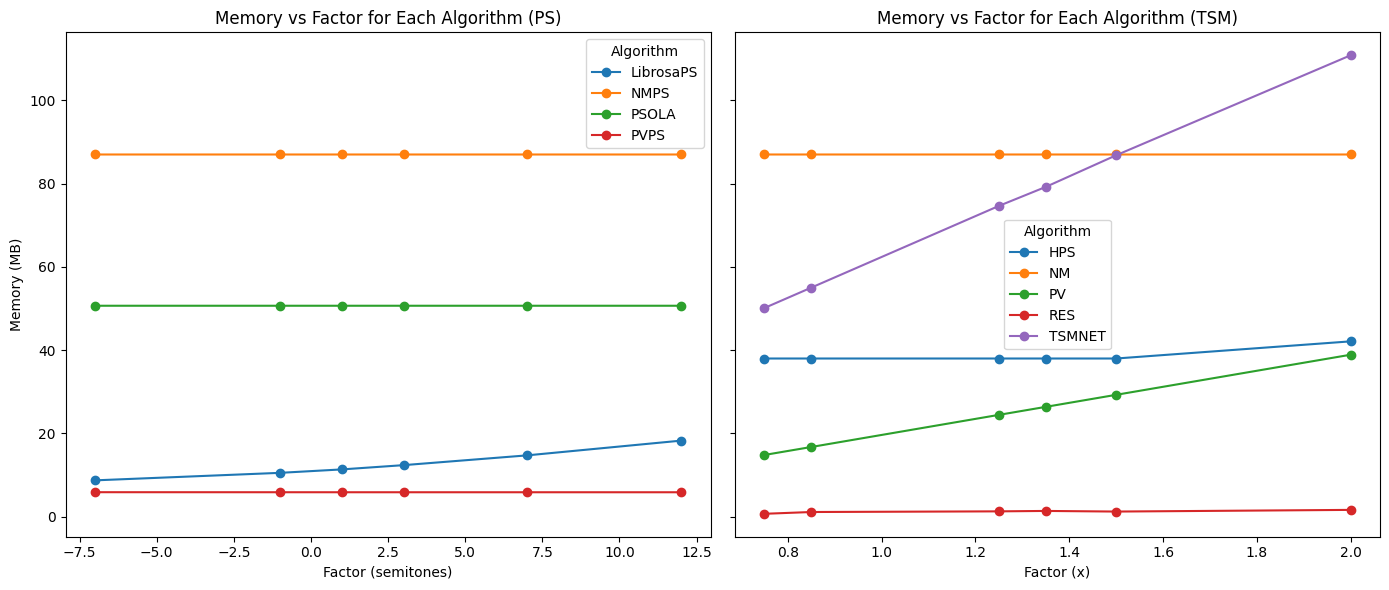

In [638]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for each algorithm in avg_memory_ps
for name, group in avg_memory_ps.groupby('algorithm'):
    axes[0].plot(group['factor'], group['memory'], label=name, marker='o')
axes[0].set_title('Memory vs Factor for Each Algorithm (PS)')
axes[0].set_xlabel('Factor (semitones)')
axes[0].legend(title='Algorithm')
axes[0].set_ylabel('Memory (MB)')

# Scatter plot for each algorithm in avg_memory_tsm
for name, group in avg_memory_tsm.groupby('algorithm'):
    axes[1].plot(group['factor'], group['memory'], label=name, marker='o')
axes[1].set_title('Memory vs Factor for Each Algorithm (TSM)')
axes[1].set_xlabel('Factor (x)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()

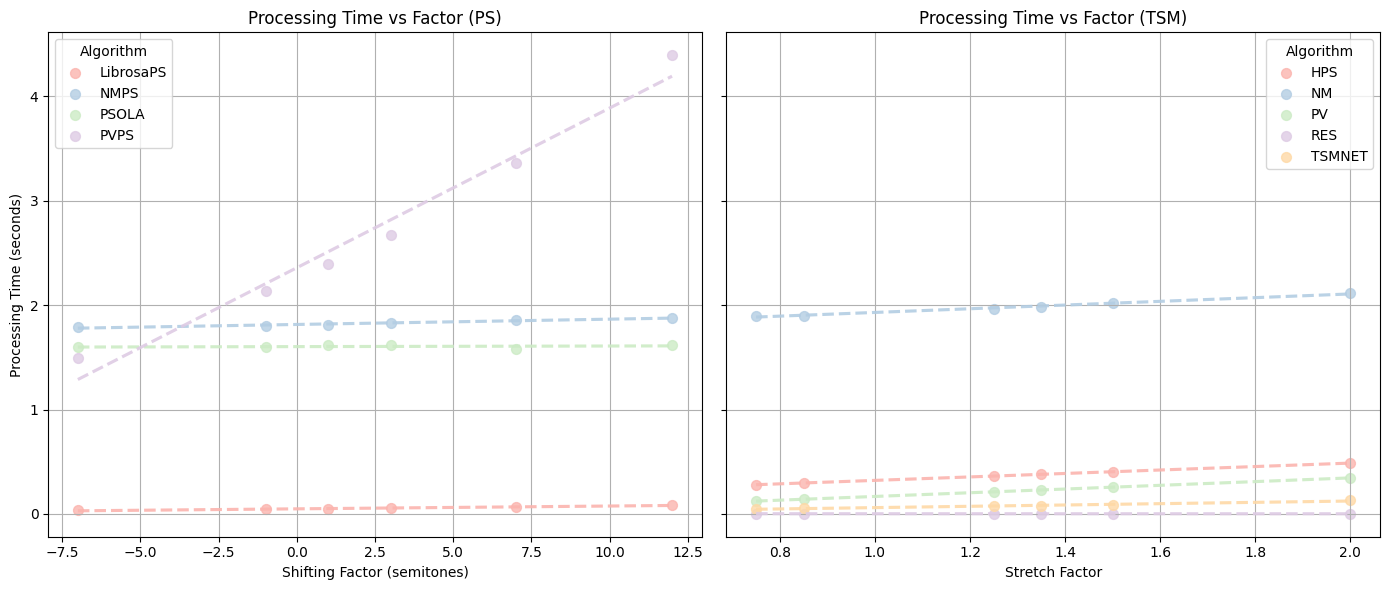

In [639]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Trend line for PS data frame grouped by algorithm
for idx, (name, group) in enumerate(avg_speed_ps.groupby('algorithm')):
    sns.regplot(
        x='factor', y='speed', data=group, ax=axes[0], label=name, 
        scatter_kws={'s': 50, 'color': colors[idx % len(colors)]}, 
        ci=None, 
        line_kws={'alpha': 0.9, 'linestyle': '--', 'color': colors[idx % len(colors)]}
    )
axes[0].set_title('Processing Time vs Factor (PS)')
axes[0].set_xlabel('Shifting Factor (semitones)')
axes[0].set_ylabel('Processing Time (seconds)')
axes[0].legend(title='Algorithm')
axes[0].grid(True)  # Add grid lines

# Trend line for TSM data frame grouped by algorithm
for idx, (name, group) in enumerate(avg_speed_tsm.groupby('algorithm')):
    sns.regplot(
        x='factor', y='speed', data=group, ax=axes[1], label=name, 
        scatter_kws={'s': 50, 'color': colors[idx % len(colors)]}, 
        ci=None, 
        line_kws={'alpha': 0.9, 'linestyle': '--', 'color': colors[idx % len(colors)]}
    )
axes[1].set_title('Processing Time vs Factor (TSM)')
axes[1].set_xlabel('Stretch Factor')
axes[1].legend(title='Algorithm')
axes[1].grid(True)  # Add grid lines
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

### Peak Memory Usage

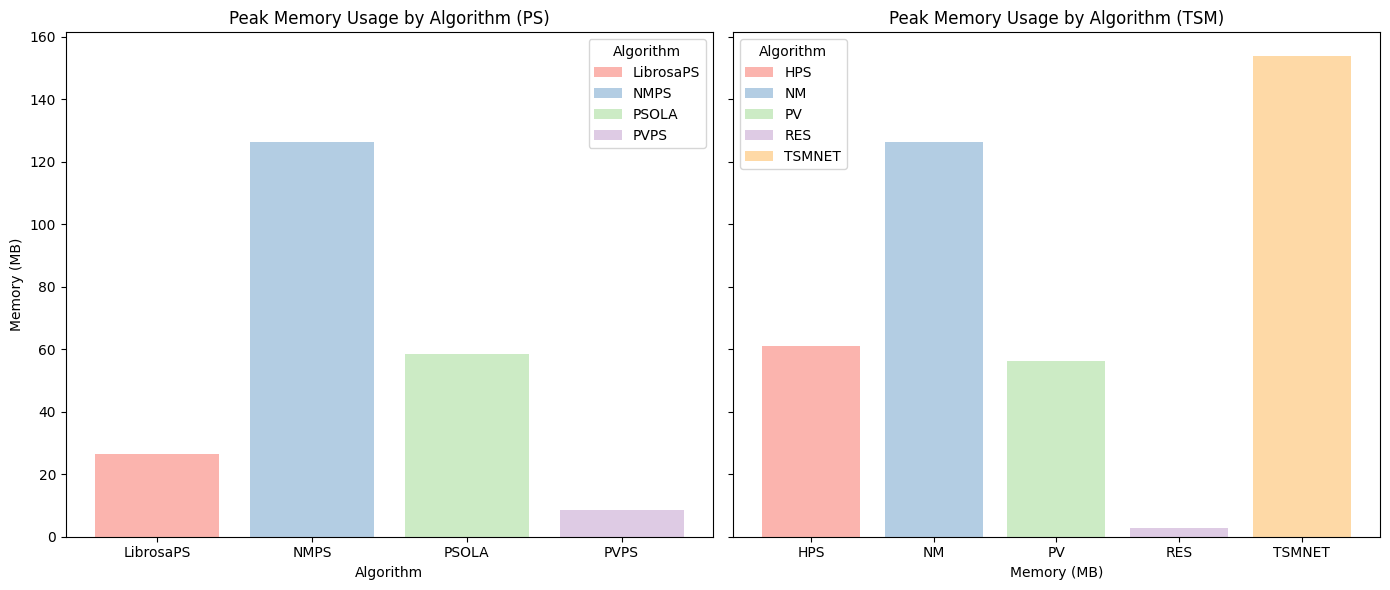

In [640]:
peak_memory_tsm = df_tsm.groupby('algorithm')['memory'].max().reset_index()
peak_memory_ps = df_ps.groupby('algorithm')['memory'].max().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(peak_memory_ps['algorithm'], peak_memory_ps['memory'], label=peak_memory_ps['algorithm'], color=colors)
axes[0].set_title('Peak Memory Usage by Algorithm (PS)')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Memory (MB)')
axes[0].legend(title='Algorithm')

axes[1].bar(peak_memory_tsm['algorithm'], peak_memory_tsm['memory'], label=peak_memory_tsm['algorithm'], color=colors)
axes[1].set_title('Peak Memory Usage by Algorithm (TSM)')
axes[1].set_xlabel('Memory (MB)')
axes[1].legend(title='Algorithm')

plt.tight_layout()
plt.show()

### Speed vs Memory

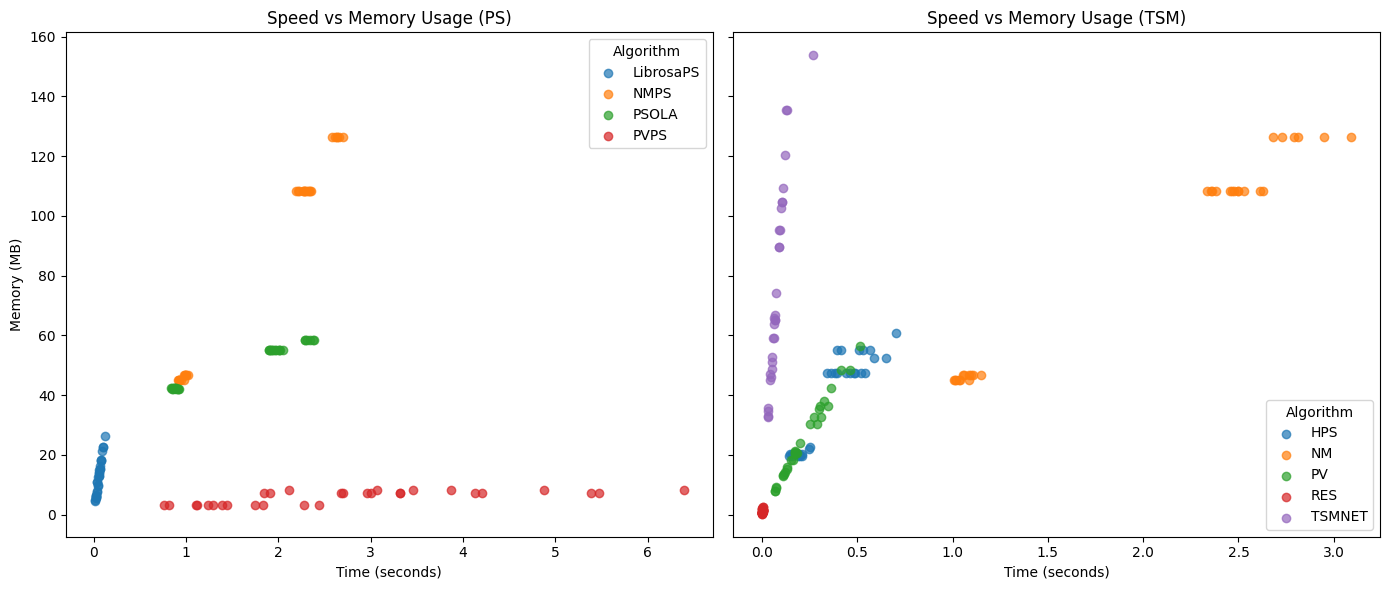

In [641]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Scatter plot for PS data frame grouped by algorithm
for name, group in df_ps.groupby('algorithm'):
    axes[0].scatter(group['speed'], group['memory'], label=name, alpha=0.7)
axes[0].set_title('Speed vs Memory Usage (PS)')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Memory (MB)')
axes[0].legend(title='Algorithm')

# Scatter plot for TSM data frame grouped by algorithm
for name, group in df_tsm.groupby('algorithm'):
    axes[1].scatter(group['speed'], group['memory'], label=name, alpha=0.7)
axes[1].set_title('Speed vs Memory Usage (TSM)')
axes[1].set_xlabel('Time (seconds)')
axes[1].legend(title='Algorithm')   

plt.tight_layout()
plt.show()